## Importing libaries and getting DataFrame

In [1]:
import uproot
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
path = "../Data/mc15_13TeV.361203.Pythia8_A2_MSTW2008LO_ND_minbias.30062015_v0_per_0.root"

In [3]:
file = uproot.open(path)
T = file['tree']
df = T.pandas.df("v0_rxy v0_chi2 cosTheta v0_ks_mass trueKs".split(" "))

## Making plots to look at the data

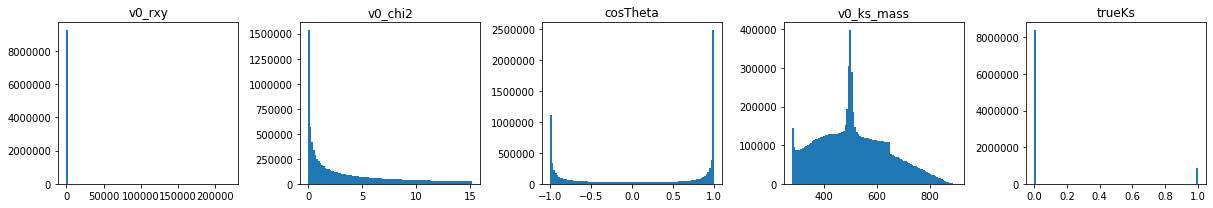

In [4]:
fig, ax = plt.subplots(ncols = 5, figsize = (17, 3))
bins = 100

# fig.suptitle("Hist of all data")

for i, col in enumerate(df.columns):
    ax[i].set_title(col)
    ax[i].hist(df[col], bins = bins)

fig.tight_layout()

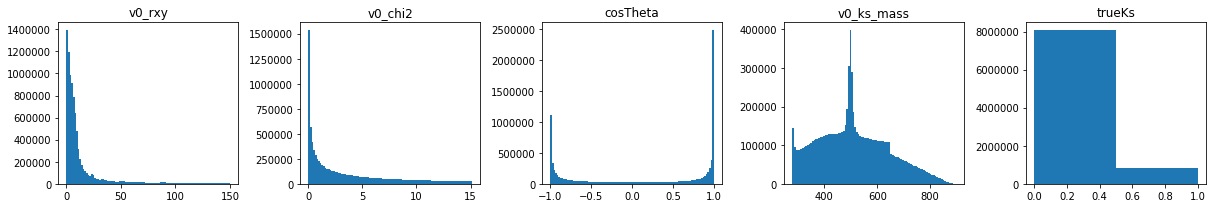

In [5]:
# Restrict v0_rxy to less than 150
cut_rxy = 150
df = df.loc[df["v0_rxy"] < cut_rxy]
ax[0].clear()
ax[0].set_title("v0_rxy")
ax[0].hist(df["v0_rxy"], bins = bins)


# Set bins of TrueKs to two
ax[4].clear()
ax[4].set_title("trueKs")
ax[4].hist(df["trueKs"], bins = 2)

#Draw plot
fig

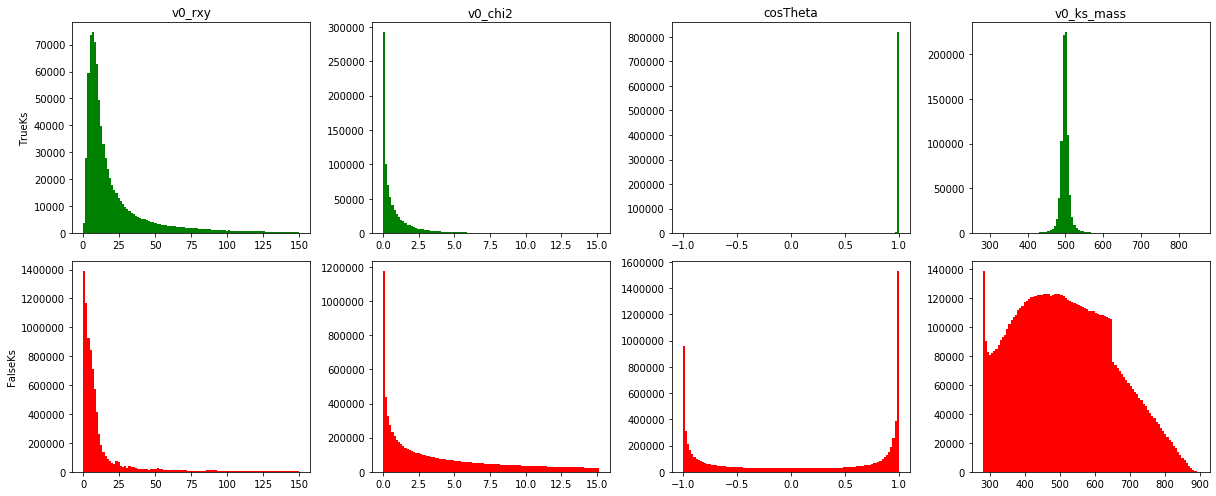

In [6]:
fig, ax = plt.subplots(ncols = 4, nrows = 2, figsize = (17, 7))

plot_values = "v0_rxy v0_chi2 cosTheta v0_ks_mass".split(" ") # Values to plot 
trueKs = df["trueKs"].astype(bool) # Identify true/false for Ks 

for i, col in enumerate(plot_values):
    ax[0][i].set_title(col)
    ax[0][i].hist(df[col].loc[trueKs], bins = bins, color = "green")
    ax[1][i].hist(df[col].loc[trueKs.apply(lambda x: not x)], bins = bins, color = "red")
    
ax[0][0].set_ylabel("TrueKs")
ax[1][0].set_ylabel("FalseKs")

fig.tight_layout()

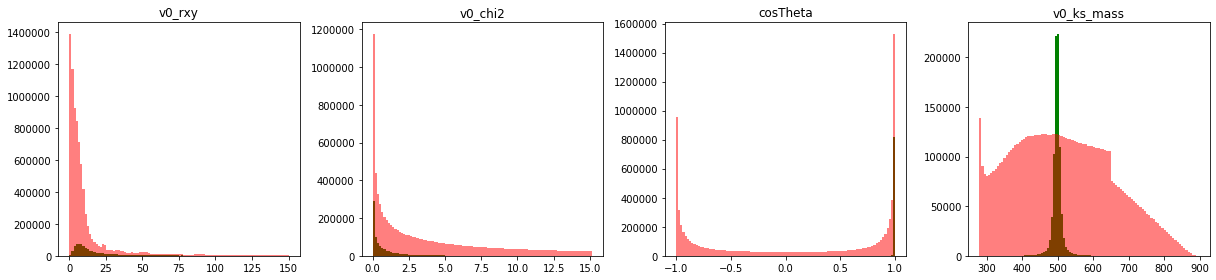

In [7]:
fig, ax = plt.subplots(ncols = 4, nrows = 1, figsize = (17, 4))

plot_values = "v0_rxy v0_chi2 cosTheta v0_ks_mass".split(" ") # Values to plot 
trueKs = df["trueKs"].astype(bool) # Identify true/false for Ks 

for i, col in enumerate(plot_values):
    ax[i].set_title(col)
    ax[i].hist(df[col].loc[trueKs], bins = bins, color = "green", alpha = 1)
    ax[i].hist(df[col].loc[trueKs.apply(lambda x: not x)], bins = bins, color = "red", alpha = 0.5)
    
fig.tight_layout()

## Making cuts
First check the amount of trueKs, so we can see how much signal and background we're cutting

In [8]:
total_signal, total_background = df['trueKs'].sum(), (df['trueKs'] == 0).sum()
print(f"The total amount of signal events is:   {total_signal} \nand the amount of background events is: {total_background}")

print("Signal is {:.2f} %".format(total_signal/(total_background + total_signal) * 100))

The total amount of signal events is:   831849 
and the amount of background events is: 8076293
Signal is 9.34 %


We now make cuts for each variable

### v0_rxy
It is clear that we need to restrict to low values. Lets take a look at v0_rxy for < 150

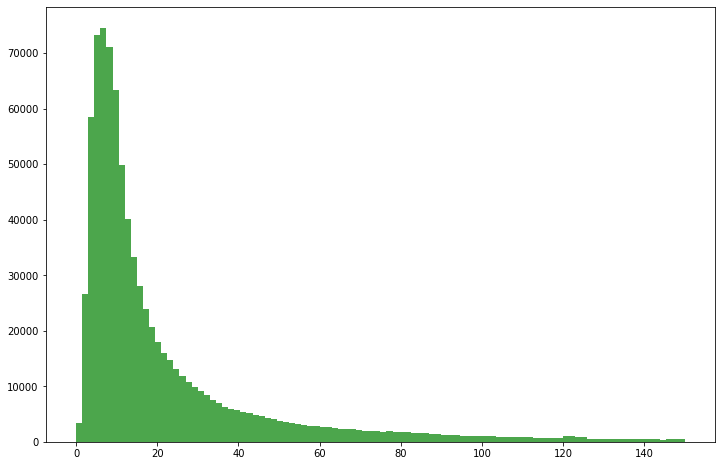

In [9]:
fig, ax = plt.subplots(figsize = (12, 8))
# ax.hist(df['v0_rxy'].loc[df['trueKs'] == 0], bins = 100, range = (0, 100), color = "red");
ax.hist(df['v0_rxy'].loc[df['trueKs'] == 1], bins = 100, range = (0, 150), color = "green", alpha = 0.7);

In [10]:
(df['v0_rxy'].loc[df['trueKs'] == 1] < 1).sum()

743

We choose to cut between 1 and 150

In [11]:
df = df.loc[np.logical_and(df['v0_rxy'] < 150, df['v0_rxy'] > 1)]

In [12]:
current_signal, current_background = df['trueKs'].sum(), (df['trueKs'] == 0).sum()
print(f"The total amount of signal events is:   {current_signal} \nand the amount of background events is: {current_background}")

print("Signal is {:.2f} %".format(current_signal/(current_background + current_signal) * 100))

print(f"Signal removed: {total_signal - current_signal} \nBackground removed: {total_background - current_background}")



The total amount of signal events is:   831106 
and the amount of background events is: 7215724
Signal is 10.33 %
Signal removed: 743 
Background removed: 860569


### Chi2

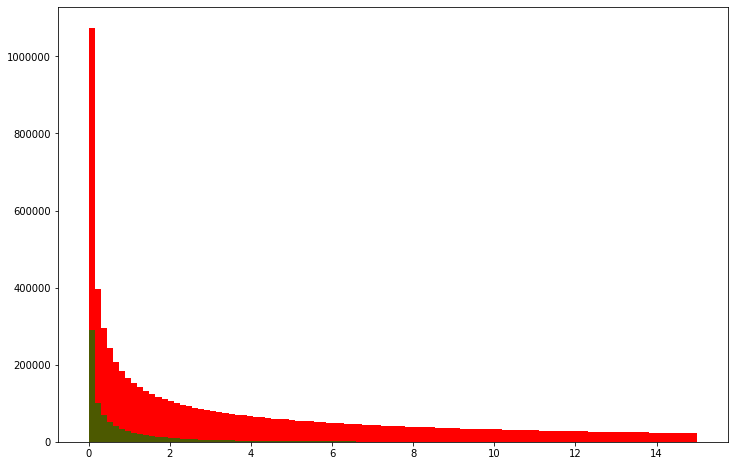

In [13]:
fig, ax = plt.subplots(figsize = (12, 8))
ax.hist(df['v0_chi2'].loc[df['trueKs'] == 0], bins = 100, range = (0, 15), color = "red");
ax.hist(df['v0_chi2'].loc[df['trueKs'] == 1], bins = 100, range = (0, 15), color = "green", alpha = 0.7);

In [14]:
(df['v0_chi2'].loc[df['trueKs'] == 1] > 3.5).sum()

54454

We cut at 3.5 and up

In [15]:
df = df.loc[df['v0_chi2'] < 3.5]

In [16]:
current_signal, current_background = df['trueKs'].sum(), (df['trueKs'] == 0).sum()
print(f"The total amount of signal events is:   {current_signal} \nand the amount of background events is: {current_background}")

print("Signal is {:.2f} %".format(current_signal/(current_background + current_signal) * 100))

print(f"Signal removed: {total_signal - current_signal} \nBackground removed: {total_background - current_background}")



The total amount of signal events is:   776652 
and the amount of background events is: 4255378
Signal is 15.43 %
Signal removed: 55197 
Background removed: 3820915


### CosTheta

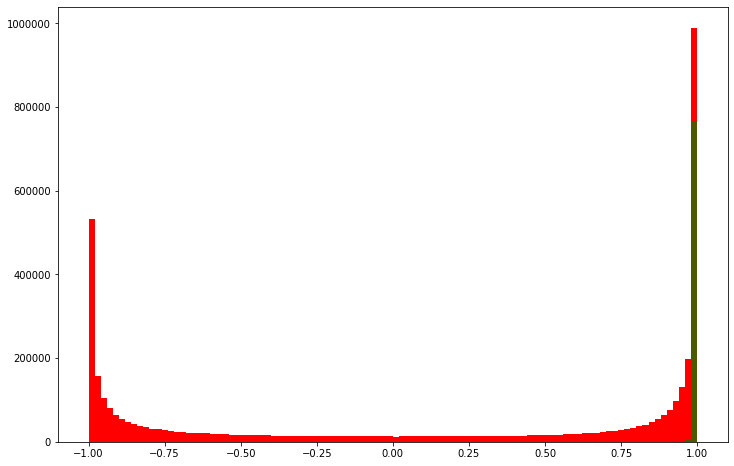

In [17]:
fig, ax = plt.subplots(figsize = (12, 8))
ax.hist(df['cosTheta'].loc[df['trueKs'] == 0], bins = 100, range = (-1, 1), color = "red");
ax.hist(df['cosTheta'].loc[df['trueKs'] == 1], bins = 100, range = (-1, 1), color = "green", alpha = 0.7);

In [18]:
(df['cosTheta'].loc[df['trueKs'] == 0] < 0.999).sum()

3772390

Set cut at 0.999

In [19]:
df = df.loc[df['cosTheta'] > 0.999]

In [20]:
current_signal, current_background = df['trueKs'].sum(), (df['trueKs'] == 0).sum()
print(f"The total amount of signal events is:   {current_signal} \nand the amount of background events is: {current_background}")

print("Signal is {:.2f} %".format(current_signal/(current_background + current_signal) * 100))

print(f"Signal removed: {total_signal - current_signal} \nBackground removed: {total_background - current_background}")

The total amount of signal events is:   676593 
and the amount of background events is: 482981
Signal is 58.35 %
Signal removed: 155256 
Background removed: 7593312


### K-short mass

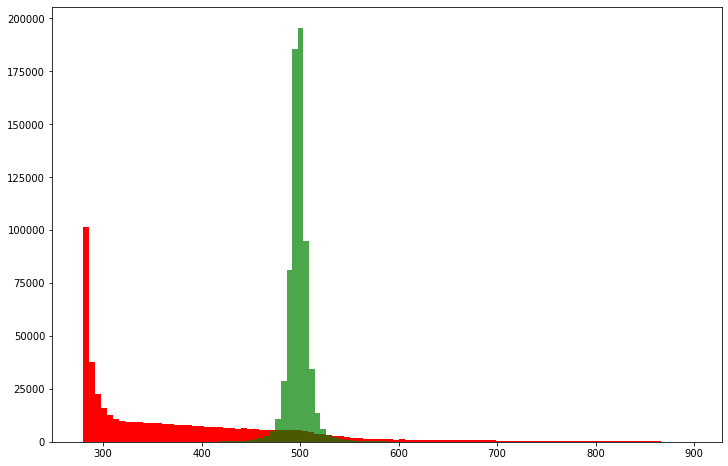

In [21]:
fig, ax = plt.subplots(figsize = (12, 8))
ax.hist(df['v0_ks_mass'].loc[df['trueKs'] == 0], bins = 100, color = "red");
ax.hist(df['v0_ks_mass'].loc[df['trueKs'] == 1], bins = 100, color = "green", alpha = 0.7);

In [22]:
df['v0_ks_mass'].loc[df['trueKs'] == 1].describe()

count    676593.000000
mean        498.681732
std          12.389851
min         280.855591
25%         493.380157
50%         498.190247
75%         503.116608
max         851.574158
Name: v0_ks_mass, dtype: float64

Check if we make a 4 sigma cut, so 498.68 +/- 5.18

In [23]:
(abs(df['v0_ks_mass'].loc[df['trueKs'] == 1] - 498.68) > 4 * 5.18).sum()

37553

In [24]:
df = df.loc[abs(df['v0_ks_mass'] - 498.68) < 4 * 5.18]

In [25]:
current_signal, current_background = df['trueKs'].sum(), (df['trueKs'] == 0).sum()
print(f"The total amount of signal events is:   {current_signal} \nand the amount of background events is: {current_background}")

print("Signal is {:.2f} %".format(current_signal/(current_background + current_signal) * 100))

print(f"Signal removed: {total_signal - current_signal} \nBackground removed: {total_background - current_background}")

The total amount of signal events is:   639040 
and the amount of background events is: 34221
Signal is 94.92 %
Signal removed: 192809 
Background removed: 8042072


## Try plot after cuts

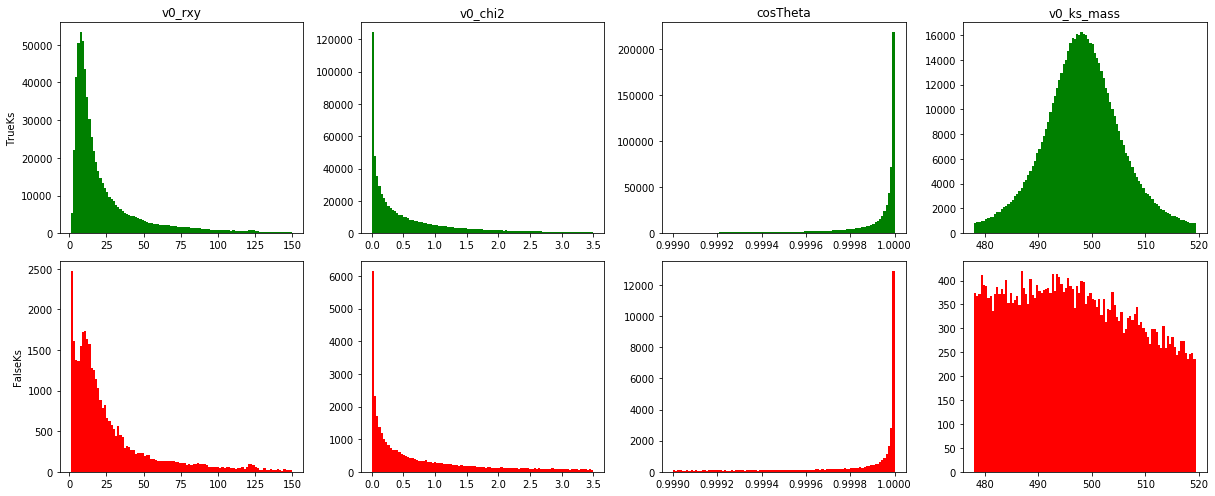

In [26]:
fig, ax = plt.subplots(ncols = 4, nrows = 2, figsize = (17, 7))

plot_values = "v0_rxy v0_chi2 cosTheta v0_ks_mass".split(" ") # Values to plot 
trueKs = df["trueKs"].astype(bool) # Identify true/false for Ks 

for i, col in enumerate(plot_values):
    ax[0][i].set_title(col)
    ax[0][i].hist(df[col].loc[trueKs], bins = bins, color = "green")
    ax[1][i].hist(df[col].loc[trueKs.apply(lambda x: not x)], bins = bins, color = "red")
    
ax[0][0].set_ylabel("TrueKs")
ax[1][0].set_ylabel("FalseKs")

fig.tight_layout()